In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import tensorflow as tf
from nltk import word_tokenize, RegexpTokenizer
import gensim.downloader as api

ModuleNotFoundError: No module named 'nltk'

In [2]:
data_train = pd.read_csv('./data/train.csv')

In [3]:
data_train["full_text"][2]
tokenizer = RegexpTokenizer(r'\w+')
text = data_train["full_text"][2]
tokens = tokenizer.tokenize(text)
data_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [4]:
data_train['full_text'][0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [5]:
length = []
for text in data_train.full_text:
    length.append(len(tokenizer.tokenize(text)))

In [6]:
data_train['essay_length'] = length

In [7]:
values = pd.DataFrame(data_train.vocabulary.value_counts()).reset_index()
index = values['index'].values
heights = values.vocabulary.values

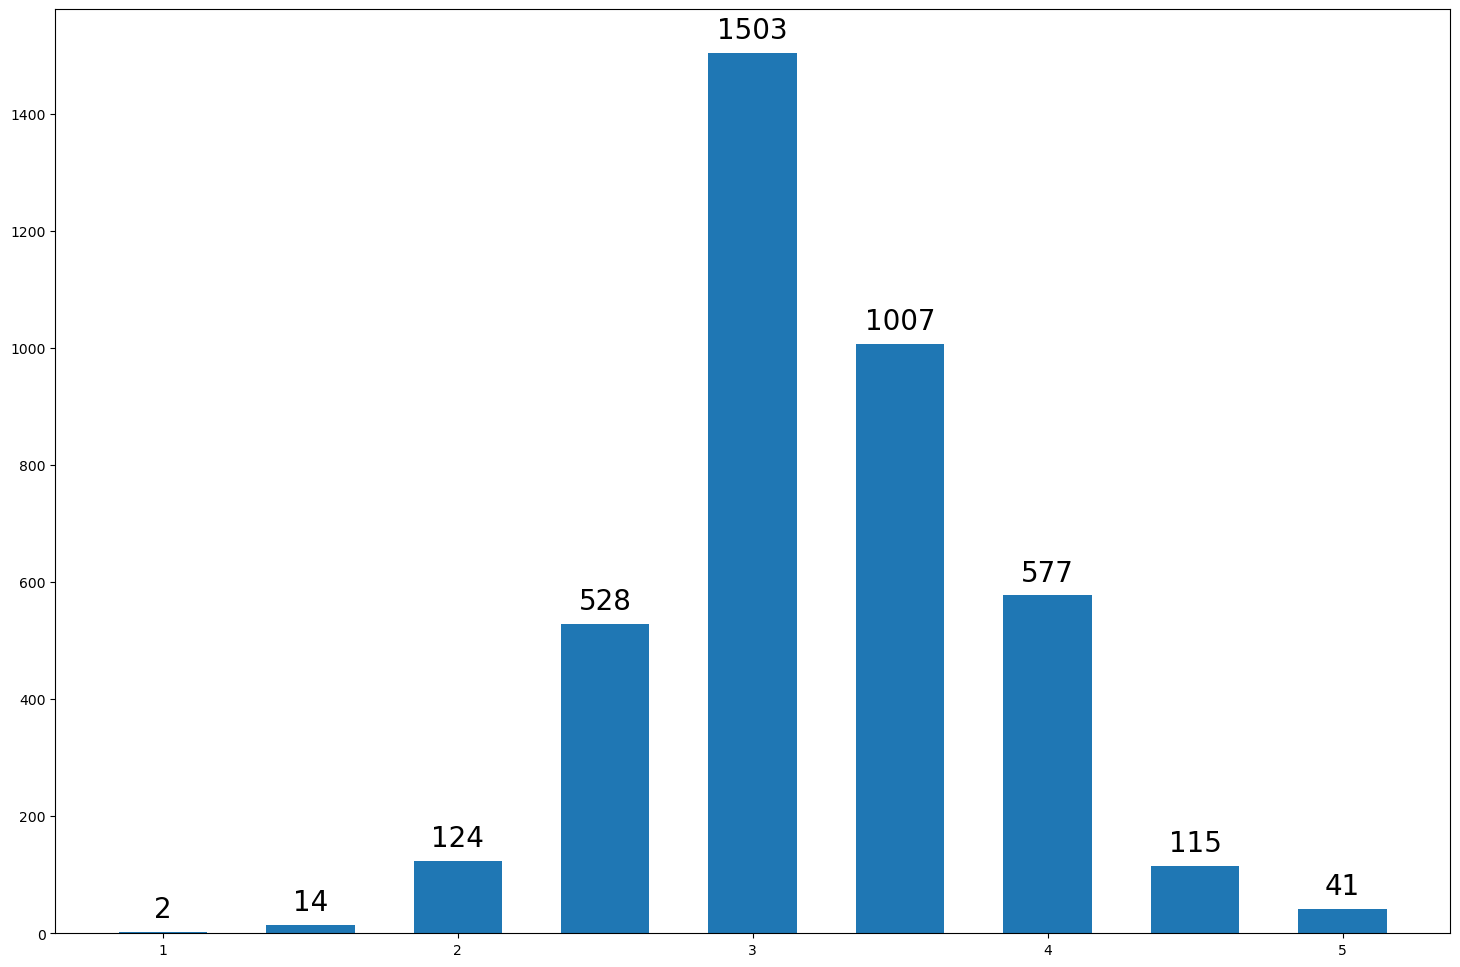

In [8]:
plt.figure(figsize=(18,12))
plt.bar(values['index'].values,values.vocabulary.values, width=0.3)
for i in range(len(index)):
    plt.text(index[i], heights[i]+25, str(heights[i]),fontsize = 20, horizontalalignment = 'center')

In [9]:
data_train.vocabulary.mean()

3.2357453336742523

In [10]:
word_vectors = api.load("glove-wiki-gigaword-100")

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [12]:
tokenizer = Tokenizer(num_words = 10000, lower=False)
tokenizer.fit_on_texts(data_train.full_text.values)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(data_train.full_text.values)
padded_sequence = pad_sequences(encoded_docs, maxlen=512)

In [13]:
print(tokenizer.word_index)

{'to': 1, 'the': 2, 'and': 3, 'you': 4, 'a': 5, 'that': 6, 'is': 7, 'in': 8, 'they': 9, 'of': 10, 'have': 11, 'be': 12, 'can': 13, 'I': 14, 'for': 15, 'it': 16, 'because': 17, 'are': 18, 'not': 19, 'do': 20, 'people': 21, 'school': 22, 'or': 23, 'with': 24, 'students': 25, 'will': 26, 'your': 27, 'we': 28, 'their': 29, 'more': 30, 'if': 31, 'what': 32, 'time': 33, 'good': 34, 'get': 35, 'my': 36, 'on': 37, 'work': 38, 'but': 39, 'like': 40, 'want': 41, 'them': 42, 'life': 43, 'help': 44, 'make': 45, 'would': 46, 'at': 47, 'when': 48, 'about': 49, 'this': 50, 'i': 51, 'think': 52, 'some': 53, 'so': 54, 'all': 55, 'from': 56, 'how': 57, 'was': 58, 'one': 59, 'other': 60, 'something': 61, 'know': 62, 'need': 63, 'there': 64, "don't": 65, 'things': 66, 'he': 67, 'me': 68, 'going': 69, 'better': 70, 'should': 71, 'go': 72, 'person': 73, 'just': 74, 'by': 75, 'example': 76, 'take': 77, 'also': 78, 'as': 79, 'always': 80, 'our': 81, 'doing': 82, 'learn': 83, 'way': 84, 'up': 85, 'who': 86, 's

In [14]:
embedding_vector_length = 64
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=512) )
#model.add(SpatialDropout1D(0.25))
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])  
print(model.summary())

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 64)           1605696   
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,671,797
Trainable params: 1,671,797
Non-trainable params: 0
_________________________________________________________________
None


2022-11-06 11:54:07.755354: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-06 11:54:07.755549: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
data_train['vocabulary_normal'] = (data_train.vocabulary-1)/4

In [16]:
M = padded_sequence.mean()
S = padded_sequence.std()
padded_sequence_normal = (padded_sequence - M)/S

In [18]:
tf.config.list_logical_devices()
tf.config.list_physical_devices('GPU')
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

TensorFlow version: 2.10.0
Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
history = model.fit(padded_sequence_normal,data_train.vocabulary_normal.values,validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5


2022-11-06 11:55:11.145110: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-06 11:55:11.716386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [ ]:
M = padded_sequence.mean()
S = padded_sequence.std()
padded_sequence_normal = (padded_sequence - M)/S

In [20]:
data_train.groupby(['vocabulary']).mean()

/var/folders/dx/sc89948n7r9d_y3ms23yc8c40000gn/T/ipykernel_3678/3242245600.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_train.groupby(['vocabulary']).mean()


,cohesion,syntax,phraseology,grammar,conventions,essay_length,vocabulary_normal
vocabulary,,,,,,,
1.0,1.000000,1.000000,1.000000,1.000000,1.000000,254.000000,0.000
1.5,1.321429,1.464286,1.357143,1.428571,1.464286,251.285714,0.125
2.0,2.237903,2.129032,2.173387,2.116935,2.193548,345.233871,0.250
2.5,2.575758,2.523674,2.512311,2.467803,2.519886,369.037879,0.375
3.0,2.938124,2.827013,2.899867,2.823021,2.889554,411.956088,0.500
3.5,3.365938,3.252731,3.387786,3.294439,3.318272,459.251241,0.625
4.0,3.663778,3.540728,3.695841,3.577990,3.613518,512.606586,0.750
4.5,4.086957,4.134783,4.182609,4.034783,4.121739,534.626087,0.875
5.0,4.451220,4.426829,4.621951,4.512195,4.426829,609.243902,1.000


In [4]:
import pandas as pd
import numpy as np
import os
import string
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [5]:
data_train.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
full_text = data_train['full_text']
cohesion = data_train['cohesion']
syntax = data_train['syntax']
vocabulary = data_train['vocabulary']
phraseology = data_train['phraseology']
grammar = data_train['grammar']
conventions = data_train['conventions']

In [7]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/arpan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def CleanText(sentences):
    #sentences = full_text.apply(lambda sequence : [ltrs for ltrs in sequence if ltrs not in string.punctuation])
    sentences = sentences.apply(lambda wrd: ''.join(wrd))
    sentences = sentences.apply(lambda sequence: [wrd for wrd in sequence.split() if wrd not in stop_words])
    sentences = sentences.apply(lambda wrd: ' '.join(wrd))
    return sentences

In [9]:
clean_text = CleanText(full_text)
clean_text

0       I think students would benefit learning home,b...
1       When problem change let best matter happening ...
2       Dear, Principal If u change school policy grad...
3       The best time life become yourself. I agree gr...
4       Small act kindness impact people change people...
                              ...                        
3906    I believe using cellphones class education us ...
3907    Working alone, students argue decission proyec...
3908    "A problem chance best" What I think quote can...
3909    Many people disagree Albert Schweitzer's quote...
3910    Do think failure main thing people consist goa...
Name: full_text, Length: 3911, dtype: object

In [10]:
from transformers import AutoTokenizer

In [11]:
list_words = [len(text.split()) for text in clean_text]
seq_len = max(list_words)

In [12]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [13]:
tokenizer.encode_plus(clean_text[0], max_length=seq_len, padding='max_length',
                     truncation=True, return_token_type_ids= True,
                     return_tensors = 'np').keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [14]:
input_ids = []
attention_mask = []
for text in clean_text:
    tokens = tokenizer.encode_plus(text, max_length=seq_len, padding='max_length',
                         truncation=True, return_token_type_ids= True,
                         return_tensors = 'np')
    input_ids.append(tokens['input_ids'])
    attention_mask.append(tokens['attention_mask'])

In [15]:
input_ids = np.asarray(input_ids)
attention_mask = np.asarray(attention_mask)
input_ids.shape

(3911, 1, 705)

In [16]:
syntax = np.asarray(syntax)
cohesion = np.asarray(cohesion)
vocabulary = np.asarray(vocabulary)
phraseology = np.asarray(phraseology)
grammar = np.asarray(grammar)
conventions = np.asarray(conventions)

In [17]:
from transformers import TFBertModel
bert = TFBertModel.from_pretrained('bert-base-cased')

Metal device set to: Apple M1


2022-11-06 12:38:16.917971: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-06 12:38:16.918264: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identica

In [18]:
from keras.layers import LSTM, Lambda
from keras.layers import add, maximum, subtract, minimum

In [19]:
def resnet(inputs, units):
    x = tf.keras.layers.LSTM(units,return_sequences = True, dropout=0.35)(inputs)
    return x

In [20]:
units = 32
input_ids_m = tf.keras.layers.Input(shape = (seq_len, ), dtype = 'int32')
attention_mask_n = tf.keras.layers.Input(shape = (seq_len, ),  dtype = 'int32')
bert_m = bert(input_ids_m, attention_mask = attention_mask_n)[0]
x = resnet(bert_m, units)
for stack in range(3):
    for block in range(1):
        y = resnet(x, units)
        if stack > 0 and block == 0:
            x = tf.keras.layers.LSTM(units, return_sequences = True, dropout=0.35, recurrent_dropout=0.35)(x)
        x = minimum([x, y])
    units *=2
x1 = tf.keras.layers.GlobalAveragePooling1D()(x)
x2 = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.concatenate([x1, x2], name="our_param")
y = tf.keras.layers.Dense(1,  name='syntax')(x)
y2 = tf.keras.layers.Dense(1, name='cohesion')(x)
y3 = tf.keras.layers.Dense(1, name='vocabulary')(x)
m = tf.keras.models.Model(inputs = [input_ids_m, attention_mask_n], outputs = [y, y2, y3])

In [21]:
m.layers[2].trainable = False

In [21]:
m.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 705)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 705)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 705,                                           

In [33]:
tf.keras.utils.plot_model(m, show_shapes=True, 
                          show_dtype=False, 
                          show_layer_names=True, 
                          expand_nested=True,
                          show_layer_activations=True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [41]:
m.compile(loss="mse", optimizer= "adam")
input_ids_m.shape

TensorShape([None, 705])

In [44]:
attention_mask = attention_mask.reshape((3911,seq_len))
attention_mask.shape

(3911, 705)

In [ ]:
input_ids = input_ids.reshape((3911, seq_len))
input_ids.shape

In [ ]:
history_training = m.fit([input_ids, attention_mask],
                         y = [syntax, cohesion, vocabulary],
                         batch_size= 1,
                         validation_split = 0.05, 
                         epochs= 6,
                         callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                                           factor=0.1, 
                                                                           mode = 'min',
                                                  patience= 1),
                             tf.keras.callbacks.EarlyStopping(patience = 2, 
                                                              monitor = 'val_loss', 
                                                              mode = 'min', 
                                                              restore_best_weights=True)])